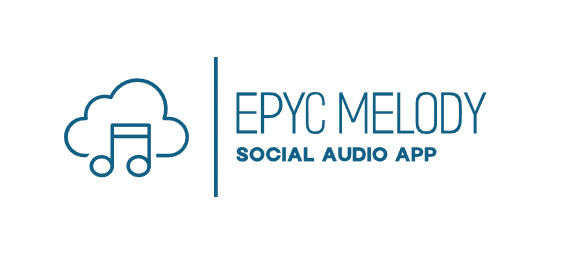

# 00 : ETUDE DES JEUX DE DONNÉES & DATAVIZ

Les jeux de données sont disponibles sur Kaggle :<br>
https://www.kaggle.com/datasets/chelseapower/nowplayingrs

- context_content_features.csv ( 2,19 Go )
- sentiment_values.csv ( 1,22 Go )
- user_track_hashtag_timestamp.csv ( 373 Ko )

<u>en fin de notebook :</u><br/>
Création du dataset de travail `df_global`. 


In [1]:
# librairies
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import time
from datetime import timedelta
begin_time = time.time()

***
## Fichier context_content_features.csv

22 variables, 11 614 671 entrées.

Ce jeu de données apporte les caractéristiques musicales de chaque morceau de musique référencé par un ou des utilisateurs.<br>
Ces caractéristiques musicales sont sous forme numérique : « instrumentalness », « liveness », …


<u>__Aperçu des données__</u>

In [2]:
# chargement
df_context = pd.read_csv('context_content_features.csv', usecols=range(0, 22))
df_context.shape

(11614671, 22)

In [3]:
# nettoyage & traitement
# suppression des lignes NaN
df_context.dropna(axis = 0, how ='all', inplace=True)

# suppression des lignes user_id vides (aucune correspondance possible avec user_track_hashtag_timestamp)
df_context.dropna(subset=['user_id'], inplace=True)

# conversion de user_id au format int pour être cohérent avec le user_id de user_track_hashtag_timestamp
df_context['user_id'] = df_context['user_id'].astype('int64')

# aperçu
print("Aperçu du dataset:")
df_context.head()

Aperçu du dataset:


,coordinates,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,...,artist_id,place,geo,tweet_lang,track_id,created_at,lang,time_zone,user_id,id
0,NaN,0.004790,0.1800,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,...,b2980c722a1ace7a30303718ce5491d8,NaN,NaN,en,cd52b3e5b51da29e5893dba82a418a4b,2014-01-01 05:54:21,en,Central Time (US & Canada),81496937,418243774842929150
1,NaN,0.017700,0.0638,0.0624,0.769,0.752,-8.252,95.862,0.26700,0.826,...,5cddcd0e314e2f2223ab21937d2c8778,NaN,NaN,en,da3110a77b724072b08f231c9d6f7534,2014-01-01 05:54:22,en,NaN,2205686924,418243779137896450
2,NaN,0.000000,0.0860,0.0436,0.675,0.775,-4.432,97.030,0.21700,0.885,...,e41273f43af504714d85465294f1f369,NaN,NaN,en,ba84d88c10fb0e42d4754a27ead10546,2014-01-01 05:54:22,es,Mountain Time (US & Canada),132588395,418243779951198200
3,NaN,0.000000,0.1430,0.0292,0.324,0.333,-5.647,74.101,0.23900,0.574,...,557ce373bd29743eb00a3723ab19ebe8,NaN,NaN,en,33f95122281f76e7134f9cbea3be980f,2014-01-01 05:54:24,en,Eastern Time (US & Canada),97675221,418243788004687900
4,NaN,0.000183,0.3620,0.0524,0.767,0.808,-5.011,114.237,0.03640,0.739,...,77bd64b4bf77e10001fd02964985ae0f,NaN,NaN,en,b5c42e81e15cd54b9b0ee34711dedf05,2014-01-01 05:54:24,en,Central Time (US & Canada),17945688,418243789753700350


In [4]:
df_context.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11570327 entries, 0 to 11614670
Data columns (total 22 columns):
 #   Column            Non-Null Count     Dtype  
---  ------            --------------     -----  
 0   coordinates       434 non-null       object 
 1   instrumentalness  11567539 non-null  float64
 2   liveness          11567427 non-null  float64
 3   speechiness       11566453 non-null  float64
 4   danceability      11566453 non-null  float64
 5   valence           11565554 non-null  float64
 6   loudness          11570327 non-null  float64
 7   tempo             11570327 non-null  float64
 8   acousticness      11567554 non-null  float64
 9   energy            11567580 non-null  float64
 10  mode              11567627 non-null  float64
 11  key               11567627 non-null  float64
 12  artist_id         11570327 non-null  object 
 13  place             0 non-null         object 
 14  geo               434 non-null       object 
 15  tweet_lang        11570327 non

In [5]:
# traitement des valeurs vides (spécifications musicales) 
# -> sans incidence vu le peu d'éléments
df_context['instrumentalness'].fillna(0, inplace=True)
df_context['liveness'].fillna(0, inplace=True)
df_context['speechiness'].fillna(0, inplace=True)
df_context['danceability'].fillna(0, inplace=True)
df_context['valence'].fillna(0, inplace=True)
df_context['loudness'].fillna(0, inplace=True)
df_context['tempo'].fillna(0, inplace=True)
df_context['acousticness'].fillna(0, inplace=True)
df_context['energy'].fillna(0, inplace=True)

df_context['time_zone'].fillna("", inplace=True)

In [6]:
# Regroupement des données géographiques par "region / continent"
# en fonction de la donnée time_zone

# colonne qui contiendra la région / continent
df_context['region'] = np.nan

start_time = time.time()

reg = "America"
lst = "US|USA|America|Alaska|Hawaii|Honolulu|Atlantic Time|Arizona|Indiana|Midway Island|Mid-Atlantic|Saskatchewan|Newfoundland"
idx = df_context[df_context['time_zone'].str.contains(lst)].index
df_context.loc[idx,'region'] = reg
del lst, reg, idx

reg = "Europe"
lst = "EU|Europe|EST|Greenland|Kyiv|Belgrade|Yerevan|Warsaw|Sofia|Riga|Azores|Ljubljana|Volgograd|Sarajevo|Skopje|Bucharest|Vladivostok|Magadan|Brussels|Tallinn|Kamchatka|Novosibirsk|Krasnoyarsk|Bratislava|Zagreb|Vilnius|Yakutsk|Prague|Minsk|Copenhagen|Petersburg|Ekaterinburg|Irkutsk|Vienna|Budapest|Paris|Moscow|Lisbon|Bern|London|Amsterdam|Athens|Stockholm|Helsinki|Dublin|Madrid|Rome|Berlin|Edinburgh"
idx = df_context[df_context['time_zone'].str.contains(lst)].index
df_context.loc[idx,'region'] = reg
del lst, reg, idx

reg = "Asia"
lst = "Tokyo|Asia|Hanoi|Chennai|Mumbai|New Delhi|Singapore|Kathmandu|Urumqi|JST|Osaka|Beijing|Rangoon|Chongqing|Sapporo|Port Moresby|Solomon Is.|Jakarta|Bangkok|Guam|Kolkata|Ulaan Bataar|Kuala|Hong Kong|Taipei|Seoul|Sri Jayawardenepura"
idx = df_context[df_context['time_zone'].str.contains(lst)].index
df_context.loc[idx,'region'] = reg
del lst, reg, idx

reg = "Latine-America"
lst = "Monterrey|Lima|Bogota|Guadalajara|La Paz|Mazatlan|Chihuahua|Georgetown|Santiago|Brasilia|Quito|Buenos Aires|Caracas|Mexico City|Tijuana"
idx = df_context[df_context['time_zone'].str.contains(lst)].index
df_context.loc[idx,'region'] = reg
del lst, reg, idx

reg = "Middle-East"
lst = "Tehran|Baghdad|Cairo|Casablanca|Istanbul|Tbilisi|Jerusalem|Kabul|Karachi|Muscat|Abu Dhabi|Kuwait|Dhaka|Baku|Tashkent|Almaty|Astana|Riyadh|Islamabad"
idx = df_context[df_context['time_zone'].str.contains(lst)].index
df_context.loc[idx,'region'] = reg
del lst, reg, idx

reg = "Africa"
lst = "Pretoria|Africa|Harare|Nairobi|Cape Verde Is.|Monrovia"
idx = df_context[df_context['time_zone'].str.contains(lst)].index
df_context.loc[idx,'region'] = reg
del lst, reg, idx

reg = "Oceania"
lst = "Perth|Melbourne|Brisbane|Sydney|New Caledonia|Adelaide|Wellington|Marshall Is.|Nuku'alofa|Canberra|Auckland|Wellington|Hobart|Samoa|Fiji|Darwin"
idx = df_context[df_context['time_zone'].str.contains(lst)].index
df_context.loc[idx,'region'] = reg
del lst, reg, idx

# regions/continents non identifiés ci-avant
df_context['region'].fillna("undefined", inplace=True)

print("temps d'éxécution =",timedelta(seconds=round((time.time() - start_time),0)))


temps d'éxécution = 0:02:26


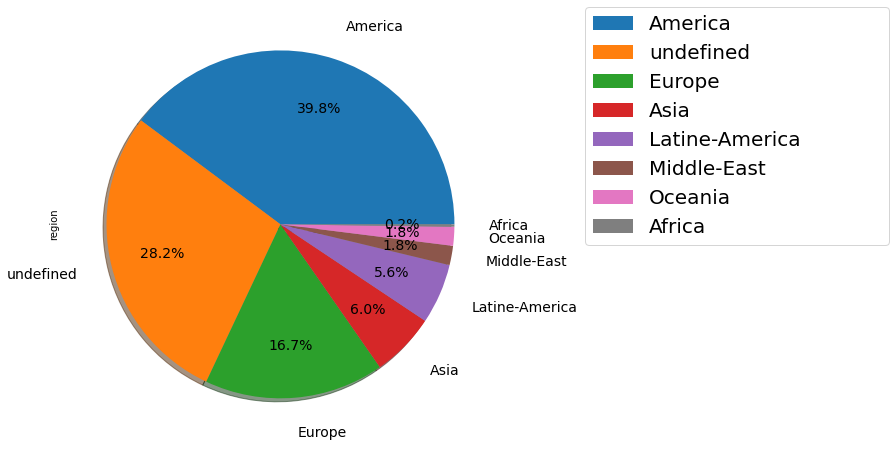

In [7]:
# aperçu des regions
plt.figure(figsize = (8, 8))

region_count = df_context['region'].value_counts()

region_count.plot(kind='pie',autopct='%1.1f%%',
           pctdistance = 0.7, labeldistance = 1.2,
           shadow = True, textprops={'fontsize': 14})
plt.title("")
plt.legend(bbox_to_anchor=(1.2, 1, 0.7, 0), mode="expand", borderaxespad=0., prop={'size': 20});


Près dun tiers des informations restent malheureusement « undefined », par conséquent nous avons abandonné l’idée de « recommandation géographique » et n’avons pas conservé cette variable.

***
## Fichier sentiment_values.csv

21 variables et 5290 entrées.

Ce jeu de données attribue à chaque hashtag (mots-clé) divers scores de sentiments selon divers lexiques / dictionnaires (AFINN, Opinion Lexicon, Sentistrength Lexicon, Vader) .<br>
Il présente 20 variables descriptives + 1 variable “cible” (hashtag).


<u>__Aperçu des données__</u>

In [8]:
df_sentiment = pd.read_csv('sentiment_values.csv', sep=',')

# reinitialisation de l'index (hashtag + 3 colonnes de valeurs par défaut)
df_sentiment.reset_index(inplace=True)

# correction des colonnes 
# (le dernier dictionnaire est appelé X_.., mais ce pourrait être un dictionnaire comme SentiWordNet)
new_cols = ['hashtag', 'vader_min', 'vader_max', 'vader_sum', 'vader_avg',
       'afinn_min', 'afinn_max', 'afinn_sum', 'afinn_avg', 'ol_min', 'ol_max',
       'ol_sum', 'ol_avg', 'ss_min', 'ss_max', 'ss_sum', 'ss_avg','X_min', 'X_max', 'X_sum', 'X_avg']
df_sentiment.columns = new_cols

# conversion des hashtags en minuscules
df_sentiment['hashtag'] = df_sentiment['hashtag'].str.lower()

df_sentiment.shape

(5290, 21)

In [9]:
# nettoyage
df_sentiment.dropna(axis = 0, how ='all', inplace=True)

# aperçu
print("Aperçu du dataset:")
df_sentiment.head()

Aperçu du dataset:


,hashtag,vader_min,vader_max,vader_sum,vader_avg,afinn_min,afinn_max,afinn_sum,afinn_avg,ol_min,...,ol_sum,ol_avg,ss_min,ss_max,ss_sum,ss_avg,X_min,X_max,X_sum,X_avg
0,relaxtime,0.8,0.8,2.4,0.8,NaN,NaN,NaN,NaN,0.7375,...,0.7375,0.7375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,melovechilicheese,0.8,0.8,0.8,0.8,NaN,NaN,NaN,NaN,0.9000,...,0.9000,0.9000,1.0,1.0,1.0,1.0,0.8,0.8,0.8,0.8
2,greatmusic,0.8,0.8,2.4,0.8,1.0,1.0,1.0,1.0,0.8875,...,0.8875,0.8875,1.0,1.0,1.0,1.0,0.8,0.8,0.8,0.8
3,rockballad,0.7,0.7,0.7,0.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,amonamarth,0.3,0.3,0.3,0.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hashtag    5290 non-null   object 
 1   vader_min  3867 non-null   float64
 2   vader_max  3867 non-null   float64
 3   vader_sum  3867 non-null   float64
 4   vader_avg  3867 non-null   float64
 5   afinn_min  255 non-null    float64
 6   afinn_max  255 non-null    float64
 7   afinn_sum  255 non-null    float64
 8   afinn_avg  255 non-null    float64
 9   ol_min     2635 non-null   float64
 10  ol_max     2635 non-null   float64
 11  ol_sum     2635 non-null   float64
 12  ol_avg     2635 non-null   float64
 13  ss_min     2823 non-null   float64
 14  ss_max     2823 non-null   float64
 15  ss_sum     2823 non-null   float64
 16  ss_avg     2823 non-null   float64
 17  X_min      2160 non-null   float64
 18  X_max      2160 non-null   float64
 19  X_sum      2160 non-null   float64
 20  X_avg   

In [11]:
df_sentiment[['vader_min', 'vader_max', 'vader_avg',
                                       'afinn_min', 'afinn_max', 'afinn_avg',
                                       'ol_min', 'ol_max', 'ol_avg',
                                       'ss_min', 'ss_max', 'ss_avg',
                                       'X_min', 'X_max', 'X_avg']
                                     ].describe().transpose().iloc[:,1:]

,mean,std,min,25%,50%,75%,max
vader_min,0.495035,0.239754,0.1000,0.3000,0.4000,0.7000,1.0
vader_max,0.513007,0.239695,0.1000,0.3000,0.6000,0.7000,1.0
vader_avg,0.503563,0.236347,0.1000,0.3000,0.6000,0.7000,1.0
afinn_min,0.745098,0.436663,0.0000,0.0000,1.0000,1.0000,1.0
afinn_max,0.752941,0.432149,0.0000,1.0000,1.0000,1.0000,1.0
afinn_avg,0.749020,0.432158,0.0000,0.5000,1.0000,1.0000,1.0
ol_min,0.523107,0.262607,0.0375,0.2875,0.6125,0.7375,0.9
ol_max,0.544905,0.260557,0.0375,0.3125,0.6500,0.7375,0.9
ol_avg,0.534016,0.256876,0.0375,0.3000,0.6125,0.7375,0.9
ss_min,0.451647,0.497745,0.0000,0.0000,0.0000,1.0000,1.0


Dans la grande majorité des cas, les valeurs minimums et maximums des notes sentiments sont similaires au sein d’un même dictionnaire (vader, afinn, ol, …).

Cela signifie que pour un hashtag donné, même si plusieurs entrées ont été utilisées, elles ont toutes conduit aux mêmes résultats.

Cependant certains lexiques ont énormément de valeurs manquantes, celui avec le moins de valeurs manquantes est Vader (3867 valeurs nulles sur 5290 entrées, soit 27% de valeurs manquantes, ou 73% de données exploitables).<br>
Le lexique afinn n’est pas retenu car il contient trop de valeurs nulles (95%).
<br>Voir ci-dessous.

In [12]:
# nombre de valeurs nulles et le % que ça représente par rapport au total des entrées
display(pd.DataFrame({'nb null': df_sentiment[['vader_avg', 'afinn_avg', 'ol_avg', 'ss_avg', 'X_avg', 'hashtag']].isnull().sum(), '% null': round(100*df_sentiment[['vader_avg', 'afinn_avg', 'ol_avg', 'ss_avg', 'X_avg', 'hashtag']].isnull().sum()/len(df_sentiment),2)}).sort_values(by='% null', ascending=False))


,nb null,% null
afinn_avg,5035,95.18
X_avg,3130,59.17
ol_avg,2655,50.19
ss_avg,2467,46.64
vader_avg,1423,26.90
hashtag,0,0.00


<u>__Correlation entre les dictionnaires / lexiques de sentiments__</u>

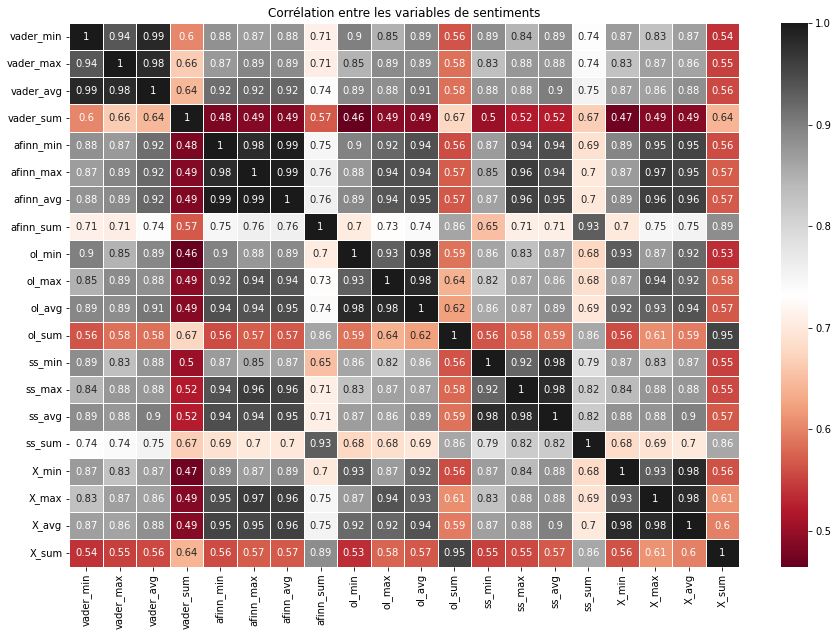

In [13]:
corr=df_sentiment[['vader_min', 'vader_max', 'vader_avg', 'vader_sum',
                       'afinn_min', 'afinn_max', 'afinn_avg', 'afinn_sum', 
                       'ol_min', 'ol_max', 'ol_avg', 'ol_sum',
                       'ss_min', 'ss_max', 'ss_avg', 'ss_sum', 
                       'X_min', 'X_max', 'X_avg', 'X_sum']].corr();

fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(corr, annot=True, ax=ax, linewidths=.5, cmap='RdGy');
plt.title('Corrélation entre les variables de sentiments');

La matrice de corrélations nous indique des corrélations très élevées entre le minimum, le maximum et la moyenne de tous les dictionnaires.<br>
Par la suite, nous nous contenterons donc d’utiliser la valeur moyenne `###_avg`


<u>__Dictionnaire / lexique de sentiments unique__</u>

Création d'une variable "sentiment score" basée sur ces 4 variables 'vader_avg', 'ss_avg', 'ol_avg', 'X_avg'.<br>
par différentes méthodes
1. sent_score1 : complétion des valeurs nulles par les valeurs des autres variables
2. sent_score2 : moyenne de toutes les variables
3. sent_score3 : vader_avg ou la moyenne des autres variables

Les variables les plus intéressantes (en terme de nombre ou de distribution) sont (sans l'ordre décroissant) :
- vader_avg car elle contient le moins de NaN
- puis ol_avg, X_avg compte tenu de leur distribution
- puis ss_avg 

(voir illustrations plus bas)

In [14]:

# 1ere option :
# compléter les valeurs nulles dans l'ordre décroissant des variables nulles 'vader_avg', 'ss_avg', 'ol_avg', 'X_avg'
df_sentiment['sent_score1'] = ((df_sentiment['vader_avg'].fillna(df_sentiment['ol_avg'])).fillna(df_sentiment['X_avg'])).fillna(df_sentiment['ss_avg'])

# 2ème option :
# faire une moyenne de toutes les valeurs
df_sentiment['sent_score2'] = df_sentiment[['vader_avg','ol_avg','X_avg','ss_avg']].mean(numeric_only=True, axis=1)

# 3ème option :
# vader_avg ou la moyenne des autres variables
df_sentiment['sent_score3'] = df_sentiment['vader_avg'].fillna(df_sentiment[['ol_avg','X_avg','ss_avg']].mean(numeric_only=True, axis=1))


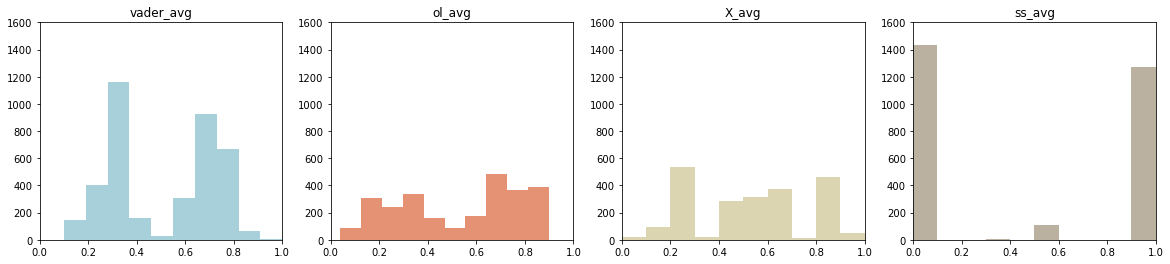

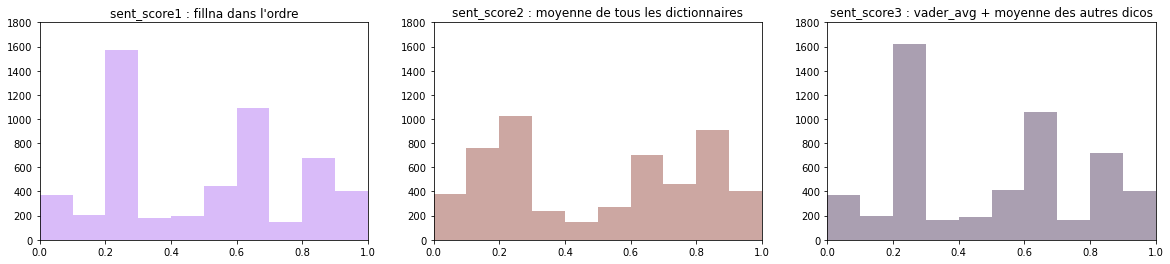

In [15]:
plt.figure(figsize=(20, 4))

plt.subplot(141)
plt.hist(df_sentiment['vader_avg'], bins=10, color='#A8D0DB')
plt.xlim([0, 1])
plt.ylim([0, 1600])
plt.title('vader_avg')

plt.subplot(142)
plt.hist(df_sentiment['ol_avg'], bins=10, color='#E49273')
plt.xlim([0, 1])
plt.ylim([0, 1600])
plt.title('ol_avg')

plt.subplot(143)
plt.hist(df_sentiment['X_avg'], bins=10, color='#DBD5B2')
plt.xlim([0, 1])
plt.ylim([0, 1600])
plt.title('X_avg')

plt.subplot(144)
plt.hist(df_sentiment['ss_avg'], bins=10, color='#BAB1A1')
plt.xlim([0, 1])
plt.ylim([0, 1600])
plt.title('ss_avg')
plt.show()

# dictionnaires créés
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.hist(df_sentiment['sent_score1'], bins=10, color='#D9BBF9')
plt.xlim([0, 1])
plt.ylim([0, 1800])
plt.title('sent_score1 : fillna dans l\'ordre')

plt.subplot(132)
plt.hist(df_sentiment['sent_score2'], bins=10, color='#CCA7A2')
plt.xlim([0, 1])
plt.ylim([0, 1800])
plt.title('sent_score2 : moyenne de tous les dictionnaires')

plt.subplot(133)
plt.hist(df_sentiment['sent_score3'], bins=10, color='#AA9FB1')
plt.xlim([0, 1])
plt.ylim([0, 1800])
plt.title('sent_score3 : vader_avg + moyenne des autres dicos')
plt.show();

Le dictionnaire « sent_score2 » nous semble le plus équilibré, c’est celui que nous conservons pour les recherches futures. 

***
## Fichier user_track_hashtag_timestamp.csv

4 variables, 17 560 113 entrées.

Ce jeu de données relie les morceaux de musiques à différents hashtags.<br>
Chaque piste de musique (identifiée par le « track_id ») est associée à un ou plusieurs hashtags par le ou les utilisateurs.<br>
Un même morceau de musique peut être renseigné plusieurs fois (jusqu’à 100 000 entrées pour un même « track_id »).


In [16]:
df_usertrack = pd.read_csv('user_track_hashtag_timestamp.csv')
df_usertrack.shape

(17560113, 4)

In [17]:
# nettoyage
df_usertrack.dropna(axis = 0, how ='all', inplace=True)

# suppression de l'entrée hashtag vide (1 seule entrée)
df_usertrack.dropna(subset=['hashtag'], inplace=True)

# conversion des hashtags en minuscules
df_usertrack['hashtag'] = df_usertrack['hashtag'].str.lower()

# aperçu
print("Aperçu du dataset:")
df_usertrack.head()

Aperçu du dataset:


,user_id,track_id,hashtag,created_at
0,81496937,cd52b3e5b51da29e5893dba82a418a4b,nowplaying,2014-01-01 05:54:21
1,81496937,cd52b3e5b51da29e5893dba82a418a4b,goth,2014-01-01 05:54:21
2,81496937,cd52b3e5b51da29e5893dba82a418a4b,deathrock,2014-01-01 05:54:21
3,81496937,cd52b3e5b51da29e5893dba82a418a4b,postpunk,2014-01-01 05:54:21
4,2205686924,da3110a77b724072b08f231c9d6f7534,nowplaying,2014-01-01 05:54:22


In [18]:
df_usertrack.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17560112 entries, 0 to 17560112
Data columns (total 4 columns):
 #   Column      Non-Null Count     Dtype 
---  ------      --------------     ----- 
 0   user_id     17560112 non-null  int64 
 1   track_id    17560112 non-null  object
 2   hashtag     17560112 non-null  object
 3   created_at  17560112 non-null  object
dtypes: int64(1), object(3)
memory usage: 669.9+ MB


In [19]:
# stats
same_track_same_user = pd.DataFrame(df_usertrack[['track_id','user_id']].groupby(['track_id','user_id']).size().reset_index(name='count'))

print("\nUn même morceau peut être renseigné par un même utilisateur : ")
print("au minimum:\t",same_track_same_user['count'].min(),"fois")
print("au maximum:\t",same_track_same_user['count'].max(),"fois")
print("en moyenne:\t",round(same_track_same_user['count'].mean(),1),"fois")


same_track_same_user_same_day = pd.DataFrame(df_usertrack[['track_id','user_id', 'created_at']].groupby(['track_id','user_id', 'created_at']).size().reset_index(name='count'))

print("\nUn même utilisateur peut renseigner  un même morceau à la même date: ")
print("au minimum:\t",same_track_same_user_same_day['count'].min(),"fois")
print("au maximum:\t",same_track_same_user_same_day['count'].max(),"fois")
print("en moyenne:\t",round(same_track_same_user_same_day['count'].mean(),1),"fois")



Un même morceau peut être renseigné par un même utilisateur : 
au minimum:	 1 fois
au maximum:	 50383 fois
en moyenne:	 5.8 fois

Un même utilisateur peut renseigner  un même morceau à la même date: 
au minimum:	 1 fois
au maximum:	 28 fois
en moyenne:	 1.6 fois


***

In [20]:
print("\ntemps d'éxécution jusque là: ",timedelta(seconds=round((time.time() - begin_time),0)))


temps d'éxécution jusque là:  0:07:22


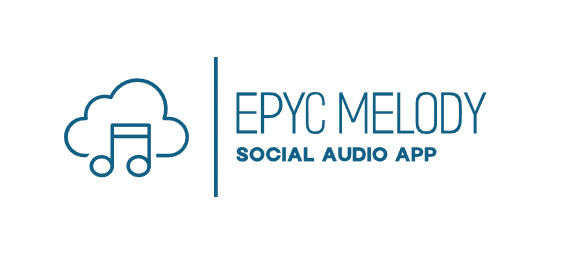

***
## Dataset de travail df_global.csv


Enrichissement du fichier des utilisateurs `df_user` (user_track_hashtag_timestamp.csv)
1. par les sentiments : `df_sentiment` (sentiment_values.csv) -> merge sur le hashtag
2. puis par les spécificités du morceau : `df_context` (context_content_features.csv) -> merge sur le `track_id` (dédoublonnage des track_id)

NB : tous les hashtags de `df_user` (user_track_hashtag_timestamp.csv) n'étant pas renseignés dans `df_sentiment` (sentiment_values.csv), la variable de score de sentiment `sent_score` comporte des NaN (elle n'est utilisée que dans le modèle n°1).


In [21]:
# nettoyage des fichiers avant merge

# hashtags sans intérêt
df_usertrack = df_usertrack[(df_usertrack['hashtag'] != "nowpalying") &
                            (df_usertrack['hashtag'] != "nowplay") &
                            (df_usertrack['hashtag'] != "nowplayin") &
                            (df_usertrack['hashtag'] != "nowplaying") &
                            (df_usertrack['hashtag'] != "np")
                           ]

# colonnes inutiles
df_context.drop(columns=['lang', 'tweet_lang', 'coordinates', 'geo', 'place', 'time_zone', 'id', 'mode', 'key'], inplace=True)


In [22]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
#  1) merge de user_track_... avec le dictionnaire de sentiment
df_global = df_usertrack.merge(right = df_sentiment, on = 'hashtag', how = 'left')

# renommage colonne score
df_global.rename(columns={"sent_score2": "sent_score"}, inplace=True)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 2) merge avec les spécificités du morceau

# dedoublonnage des morceaux (track_id)
# et supppression des infos déjà présentes dans df_usertrack : created_at & user_id
df_context_cleaned = df_context.drop_duplicates(subset=['track_id']).drop(columns=['created_at', 'user_id'])

# merge
df_global = df_global.merge(right = df_context_cleaned, on = 'track_id', how = 'left')

# meilleur ordonnancement des colonnes
df_global = df_global[['user_id', 'track_id', 'artist_id', 'created_at', 
                       'instrumentalness', 'liveness', 'speechiness', 'danceability', 'valence',
                       'loudness', 'tempo', 'acousticness', 'energy',
                       'region', 'hashtag', 'sent_score'
                      ]]

df_global = df_global.dropna(subset=['liveness', 'hashtag']).reset_index()

# écriture du fichier csv
df_global.to_csv('df_global.csv',index=False)
df_global.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351534 entries, 0 to 6351533
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   index             6351534 non-null  int64  
 1   user_id           6351534 non-null  int64  
 2   track_id          6351534 non-null  object 
 3   artist_id         6351534 non-null  object 
 4   created_at        6351534 non-null  object 
 5   instrumentalness  6351534 non-null  float64
 6   liveness          6351534 non-null  float64
 7   speechiness       6351534 non-null  float64
 8   danceability      6351534 non-null  float64
 9   valence           6351534 non-null  float64
 10  loudness          6351534 non-null  float64
 11  tempo             6351534 non-null  float64
 12  acousticness      6351534 non-null  float64
 13  energy            6351534 non-null  float64
 14  region            6351534 non-null  object 
 15  hashtag           6351534 non-null  object 
 16  

In [23]:
# aperçu
df_global.head()

,index,user_id,track_id,artist_id,created_at,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,region,hashtag,sent_score
0,0,81496937,cd52b3e5b51da29e5893dba82a418a4b,b2980c722a1ace7a30303718ce5491d8,2014-01-01 05:54:21,0.00479,0.1800,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,America,goth,NaN
1,1,81496937,cd52b3e5b51da29e5893dba82a418a4b,b2980c722a1ace7a30303718ce5491d8,2014-01-01 05:54:21,0.00479,0.1800,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,America,deathrock,0.190625
2,2,81496937,cd52b3e5b51da29e5893dba82a418a4b,b2980c722a1ace7a30303718ce5491d8,2014-01-01 05:54:21,0.00479,0.1800,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,America,postpunk,0.000000
3,3,2205686924,da3110a77b724072b08f231c9d6f7534,5cddcd0e314e2f2223ab21937d2c8778,2014-01-01 05:54:22,0.01770,0.0638,0.0624,0.769,0.752,-8.252,95.862,0.26700,0.826,undefined,80s,NaN
4,4,2205686924,da3110a77b724072b08f231c9d6f7534,5cddcd0e314e2f2223ab21937d2c8778,2014-01-01 05:54:22,0.01770,0.0638,0.0624,0.769,0.752,-8.252,95.862,0.26700,0.826,undefined,retro,NaN


***
## Fin

In [24]:
print("\ntemps d'éxécution total du notebook: ",timedelta(seconds=round((time.time() - begin_time),0)))


temps d'éxécution total du notebook:  0:11:58
